# Exploring Data Science Questions – Insights from Stack Exchange

## Table of Contents

- [1. Introduction](#1.-Introduction)
- [2. Stack Exchange](#2.-Stack-Exchange)
- [3. Data Science Stack Exchange (DSSE)](#3.-Data-Science-Stack-Exchange-(DSSE))
- [4. Stack Exchange Data Explorer (SEDE)](#4.-Stack-Exchange-Data-Explorer-(SEDE))
- [5. Acquiring the Data](#5.-Acquiring-the-Data)
- [6. Exploring the Data](#6.-Exploring-the-Data)
- [7. Cleaning the Data](#7.-Cleaning-the-Data)
- [8. Exploring Tag Popularity](#8.-Exploring-Tag-Popularity)
    - [8.1. Determining the Top 10 Most Used Tags](#8.1.-Determining-the-Top-10-Most-Used-Tags)
    - [8.2. Determining the Top 10 Most Viewed Tags](#8.2.-Determining-the-Top-10-Most-Viewed-Tags)
    - [8.3. Comparing the Top 10 Most Used and Viewed Tags](#8.3.-Comparing-the-Top-10-Most-Used-and-Viewed-Tags)
- [9. Understanding Relationships Between Tags](#9.-Understanding-Relationships-Between-Tags)
    - [9.1. Analyzing the Top 20 Most Used and Viewed Tags](#9.1.-Analyzing-the-Top-20-Most-Used-and-Viewed-Tags)
    - [9.2. Exploring and Visualizing Tag Pairing Frequencies](#9.2.-Exploring-and-Visualizing-Tag-Pairing-Frequencies)
- [10. Is Deep Learning Just a Passing Trend?](#10.-Is-Deep-Learning-Just-a-Passing-Trend?)
    - [10.1. Identifying Deep Learning Questions from Tags](#10.1.-Identifying-Deep-Learning-Questions-from-Tags)
    - [10.2. Exploring Quarterly Deep Learning Trends](#10.2.-Exploring-Quarterly-Deep-Learning-Trends)
- [11. Conclusion](#11.-Conclusion)

## 1. Introduction

In this project, we'll assume that we're working for a company that creates data science content, whether it's videos, online articles, or interactive text-based platforms like [Dataquest](https://www.dataquest.io/).

We're tasked with figuring out what the **"best"** content to write about is. Since we're passionate about helping people learn, we've decided to scour the internet to answer the question: *What do people want to learn about in data science?* This could also help us determine the most profitable content.


Thinking back to our experience when we first started learning programming, it occurs to us that if we wanted to figure out what programming content to write, we could consult [Stack Overflow](https://stackoverflow.com/), which is a question and answer website about programming, and see what kind of content is popular. After investigating Stack Overflow a little more, we found out that it is part of a question and answer website network called [Stack Exchange](https://en.wikipedia.org/wiki/Stack_Exchange).

## 2. Stack Exchange

[Stack Exchange](https://stackexchange.com/) hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science. Here's a sample of the most popular sites:

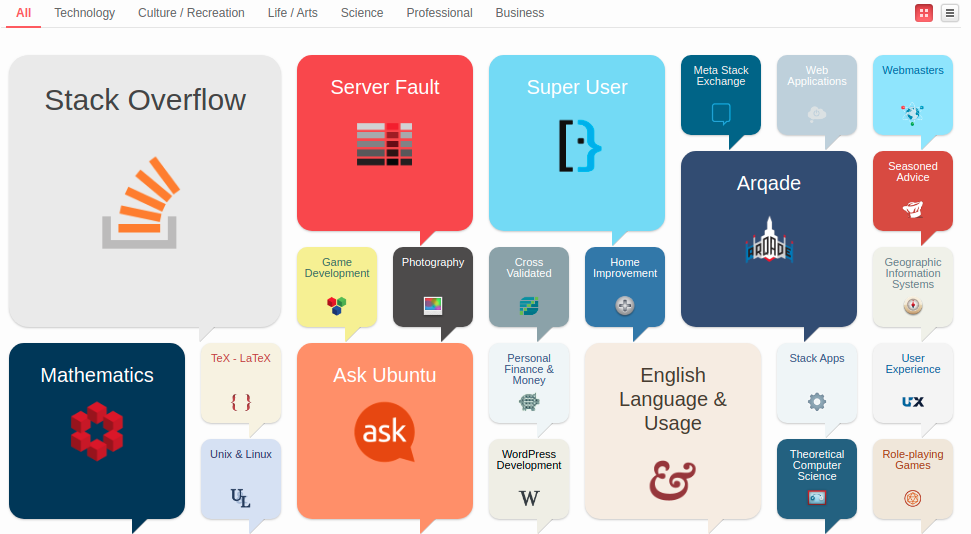

Stack Exchange employs a reputation award system for its questions and answers. Each post – each question/answer – is subject to upvotes and downvotes; this ensures that good posts are easily identifiable. Since data science is a multidisciplinary field, there are a few Stack Exchange websites that may be relevant to our goal:

- [Data Science](https://datascience.stackexchange.com/).
- [Cross Validated](https://stats.stackexchange.com/) – a statistics site.
- [Artificial Intelligence](https://ai.stackexchange.com/).
- [Mathematics](https://math.stackexchange.com/).
- [Stack Overflow](https://stackoverflow.com/).

We can find a complete list of Stack Exchange websites sorted by the percentage of questions that received answers [here](https://stackexchange.com/sites?view=list#percentanswered). At the time of this writing, [Data Science Stack Exchange](https://datascience.stackexchange.com/) (DSSE) is in the bottom `10` sites with respect to this metric. Contrary to the others, the fact that DSSE is a data science-dedicated site, coupled with it having a lot of unanswered questions, makes it an ideal candidate for our investigation.

## 3. Data Science Stack Exchange (DSSE)

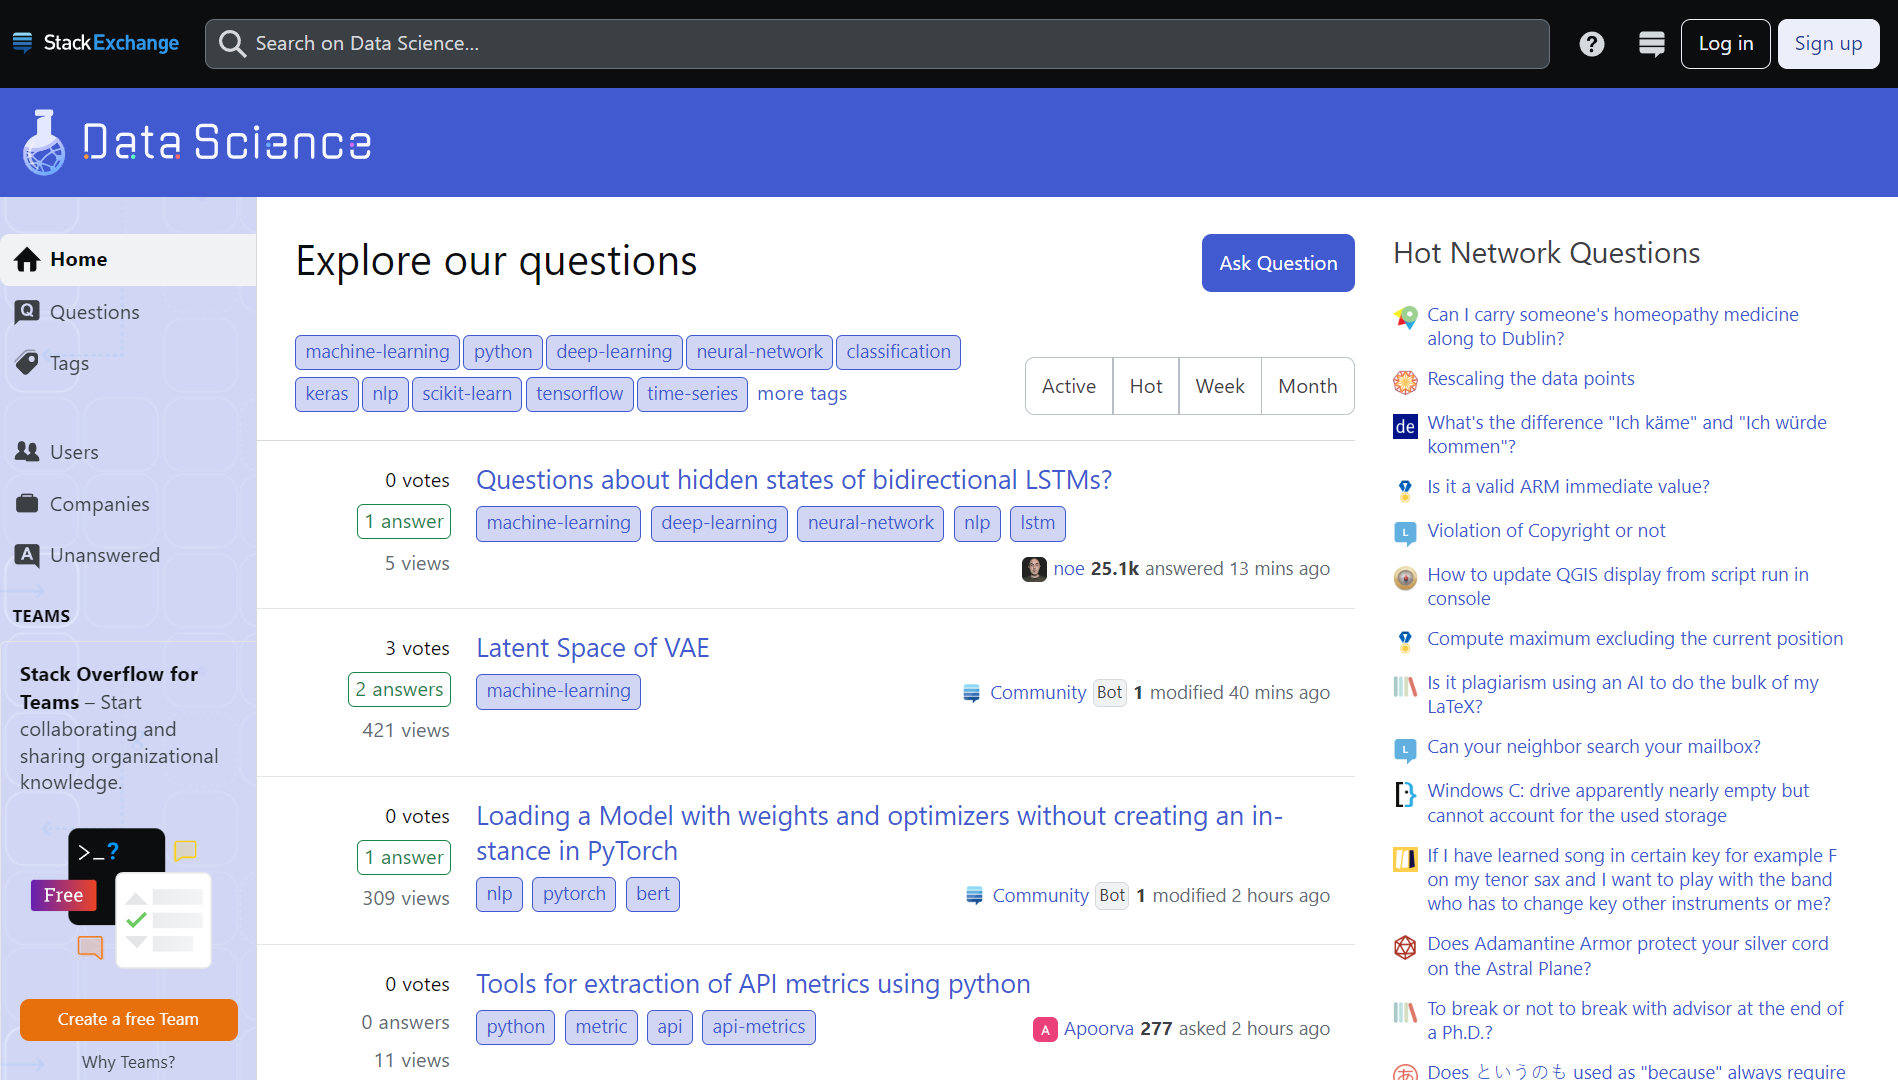

[Data Science Stack Exchange](https://datascience.stackexchange.com/) (DSSE) welcomes questions related to various aspects of data science, including but not limited to:

* Data preprocessing and cleaning.
* Data analysis and visualization techniques.
* Machine learning algorithms and methodologies.
* Tools and software commonly used in data science.
* Ethical considerations in data science.

The site's homepage includes:

* `Tags` – represent specific keywords associated with posts.
* `Explore our questions` – a section that allows users to navigate to different posts.
* `Hot Network Questions` – a section that showcases popular or trending posts from a wider network of communities beyond data science.
* `Ask Question` – allows users to ask questions by creating a new post on the website.

Each post typically contains the following information:

- `Title` – describes a question or topic.
- `Body` – explains the question or issue in detail.
- `Tags` – indicate the relevant topics or keywords.
- `Votes` – represent the number of upvotes and downvotes received from community members.
- `Answers` – represent community members' responses who attempt to provide solutions.

Several aspects of the site can be useful in understanding what people want to learn about in data science. For instance, by analyzing the popularity and frequency of different tags, one can identify the topics that are garnering significant interest within the data science community. Moreover, examining the types of questions that remain unanswered can provide insights into areas where people may be seeking more assistance, or where there may be gaps in available resources.

## 4. Stack Exchange Data Explorer (SEDE)

Accessing data en masse can be challenging; one potential solution is to [scrape](https://en.wikipedia.org/wiki/Web_scraping) the website. However, given that Stack Exchange provides a public database for each of its websites, we will simply query and explore the Data Science Stack Exchange's [database](https://data.stackexchange.com/datascience/query/new).

It's worth noting that SEDE employs a different dialect ([Transact-SQL](https://en.wikipedia.org/wiki/Transact-SQL) – Microsoft's SQL) compared to [SQLite](https://en.wikipedia.org/wiki/SQLite). For example, the query below selects the top `10` results from the `Tags` table. However, in SQLite, we would use the keyword `LIMIT` instead of `TOP`, and place it at the end of the query rather than within the `SELECT` statement:

```
SELECT TOP 10 *
  FROM Tags
 ORDER BY Count DESC;
```

After exploring the Data Science Stack Exchange's [database](https://data.stackexchange.com/datascience/query/new) and examining several tables, we've identified the table `Posts` as particularly promising for uncovering popular content. This table contains information about individual posts on the Data Science Stack Exchange site.

## 5. Acquiring the Data

The `Posts` table contains numerous columns, so we'll concentrate only on those that appear pertinent to our objective. Just to reiterate, our goal is to answer the question: *What do people want to learn about in data science?*

- `Id` – an identification number for the post.
- `PostTypeId` – an identification number for the type of post (`Question`, `Answer`, `Wiki`, etc.).
- `CreationDate` – the date and time of a post's creation.
- `Score` – the post's score.
- `ViewCount` – the number of times a post has been viewed.
- `Tags` – the tags used in a post.
- `AnswerCount` – the number of answers a `Question` post has received.
- `FavoriteCount` – the number of times a `Question` post has been favorited.

Columns like `ViewCount`, `AnswerCount`, and `FavoriteCount` offer insights into post popularity, aligning with our objectives. Before pinpointing relevant post types, we'll execute the following query against the SEDE DSSE [database](https://data.stackexchange.com/datascience/query/new) to tally the count of each post type up to `December 31, 2019`:

```
SELECT PostTypeId, COUNT(*) as NumberOfPosts
  FROM Posts
 WHERE CreationDate < '2020-01-01 00:00:00'
 GROUP BY PostTypeId
 ORDER BY PostTypeId;
```

| PostTypeId | NumberOfPosts |
|------------|---------------|
| 1          | 18804         |
| 2          | 23136         |
| 4          | 236           |
| 5          | 236           |
| 6          | 11            |
| 7          | 1             |

Because of their low volume, any post type other than `Question` or `Answer` is considered insignificant. For our analysis, we'll concentrate solely on questions (`PostTypeId = 1`). Since we're initially restricting our analysis to posts from `2019`, we'll execute the query below and store the results in a CSV file named `2019_questions.csv`.

```
SELECT Id, PostTypeId, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM Posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019
 ORDER BY Id;
```

## 6. Exploring the Data

Now that we've stored the results of the previous query in a CSV file, let's read it into a DataFrame for inspection.

In [1]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame, parsing the 'CreationDate' column as datetime
questions_2019 = pd.read_csv("Datasets/2019_questions.csv", parse_dates=["CreationDate"])

# Display the first few rows
questions_2019.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,43363,1,2019-01-01 03:53:02,0,66,<machine-learning><nlp>,1,NaN
1,43366,1,2019-01-01 06:02:07,3,197,<deep-learning><image-classification><convolut...,1,NaN
2,43367,1,2019-01-01 06:16:26,0,43,<scikit-learn><tensorflow><scipy>,1,NaN
3,43370,1,2019-01-01 10:06:03,2,38,<classification>,0,NaN
4,43374,1,2019-01-01 13:18:02,3,52,<deep-learning><time-series><cnn><convolution>,1,NaN


Next, let's display concise summary information about the dataset, and count the number of missing values in each column.

In [2]:
# Display concise summary information
questions_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6748 entries, 0 to 6747
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6748 non-null   int64         
 1   PostTypeId     6748 non-null   int64         
 2   CreationDate   6748 non-null   datetime64[ns]
 3   Score          6748 non-null   int64         
 4   ViewCount      6748 non-null   int64         
 5   Tags           6748 non-null   object        
 6   AnswerCount    6748 non-null   int64         
 7   FavoriteCount  160 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 421.9+ KB


In [3]:
# Count the number of missing values in each column
questions_2019.isna().sum()

Id                  0
PostTypeId          0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    6588
dtype: int64

Based on the outputs above, we observe the following:

- The DataFrame contains `6748` entries and `8` columns.
- The `CreationDate` column has been correctly parsed as datetime.
- The `Tags` column appears to contain lists of tags associated with each post, indicating that posts are categorized into multiple tags.
- The `FavoriteCount` column has `6588` missing values, suggesting that most posts haven't been favorited. This implies that this feature might not be significant in this context and can be disregarded.
- The `ViewCount` column indicates the popularity of each post based on the number of views. On the other hand, the `AnswerCount` column shows how many answers each question received, providing insights into the engagement level of the community.

## 7. Cleaning the Data

Fortunately for us, the folks at Stack Exchange did a great job of providing clean data. Now, let's fill in the missing values and set the appropriate type for the `FavoriteCount` column, and clean up the `Tags` column to suit our purposes.

In [4]:
# Fill missing values with 0, and convert the 'FavoriteCount' column to integer type
questions_2019["FavoriteCount"].fillna(0, inplace=True)
questions_2019["FavoriteCount"] = questions_2019["FavoriteCount"].astype(int)

# Clean up the 'Tags' column by removing angle brackets and splitting tags into a list
questions_2019["Tags"] = (questions_2019["Tags"].str.replace(r"^<|>$", "", regex=True)
                                                .str.split("><"))

# Display the first few rows to inspect the data
questions_2019.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,43363,1,2019-01-01 03:53:02,0,66,"[machine-learning, nlp]",1,0
1,43366,1,2019-01-01 06:02:07,3,197,"[deep-learning, image-classification, convolut...",1,0
2,43367,1,2019-01-01 06:16:26,0,43,"[scikit-learn, tensorflow, scipy]",1,0
3,43370,1,2019-01-01 10:06:03,2,38,[classification],0,0
4,43374,1,2019-01-01 13:18:02,3,52,"[deep-learning, time-series, cnn, convolution]",1,0


After filling in the missing values, setting the appropriate data type for the `FavoriteCount` column, and cleaning up the `Tags` column as needed. We're now ready to proceed with our analysis.

## 8. Exploring Tag Popularity

### 8.1. Determining the Top 10 Most Used Tags

To determine the most popular tags, we will consider two different proxies for popularity – the number of times each tag was used and viewed. While we could also consider factors like score or whether a question is favorited by users, we will limit our research to counts and views for now. First, let's identify the top `10` most used tags.

In [5]:
# Explode the 'Tags' column to create individual tags
individual_tags = questions_2019["Tags"].explode("Tags")
individual_tags.head()

0                machine-learning
1                             nlp
2                   deep-learning
3            image-classification
4    convolutional-neural-network
Name: Tags, dtype: object

In [6]:
# Count the frequency of each tag's usage
use_counts = individual_tags.value_counts()

# Reset the index and rename the 'count' column to 'UseCount'
use_counts = use_counts.reset_index().rename(columns={"count":"UseCount"})

# Select the top 10 most used tags and sort them by 'UseCount'
top_10_used = use_counts[:10].sort_values("UseCount")
top_10_used

,Tags,UseCount
9,cnn,378
8,tensorflow,409
7,nlp,443
6,scikit-learn,448
5,classification,577
4,keras,704
3,neural-network,822
2,deep-learning,894
1,python,1439
0,machine-learning,2129


Now, let's visualize the top `10` most used tags with a horizontal bar plot.

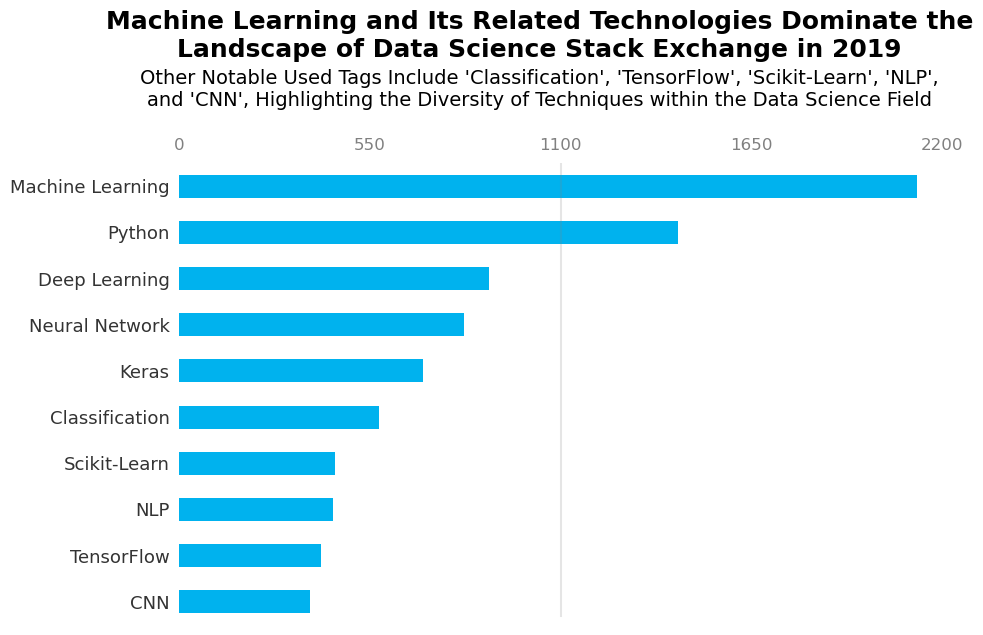

In [7]:
# Create figure and axes objects, and add a main title and subtitle
fig, ax = plt.subplots(figsize=(10,6))
plt.suptitle("Machine Learning and Its Related Technologies Dominate the\n\
Landscape of Data Science Stack Exchange in 2019",
             x=0.485, y=1.135, fontsize=18, ha="center", fontweight='bold')
plt.title("Other Notable Used Tags Include 'Classification', 'TensorFlow', 'Scikit-Learn', 'NLP',\n\
and 'CNN', Highlighting the Diversity of Techniques within the Data Science Field",
          ha="center", x=0.465, y=1.105, fontsize=14)

# Create a horizontal bar plot for the top 10 most used tags
top_10_used.plot.barh(x="Tags", y="UseCount", color="#00B2EE", legend=False, ax=ax)

# Customize ticks, labels, and add a vertical line
ax.set_yticklabels(['CNN', 'TensorFlow', 'NLP', 'Scikit-Learn', 'Classification', 'Keras',
                    'Neural Network', 'Deep Learning', 'Python', 'Machine Learning'])
ax.set_ylabel(None)
ax.set_xticks([0, 550, 1100, 1650, 2200])  
ax.xaxis.tick_top()

ax.tick_params(top=False, left=False)      
ax.tick_params(axis='x', colors='grey', labelsize=12)
ax.tick_params(axis='y', colors='#333333', labelsize=13)

ax.axvline(x=1100, ymin=0.02, c='grey', alpha=0.2)  

# Remove spines from the plot
ax.spines[:].set_visible(False)

# Display the plot
plt.show()

Based on the top `10` most used tags, it's evident that machine learning and its related technologies dominate the landscape of Data Science Stack Exchange in `2019`. The top tag, `Machine Learning`, stands out with a significant use count of `2129`, indicating its prevalence and importance in the field.

Following behind, the tag `Python` emerges as the second most frequently used tag, with a use count of `1439`. This reaffirms Python's status as the programming language of choice for data scientists due to its versatility, ease of use, and extensive libraries for data analysis, manipulation, and visualization.

Additionally, deep learning tags such as `Deep Learning`, `Neural Network`, and `Keras` feature prominently among the top tags, indicating a growing interest and focus on advanced machine learning methodologies.

Other notable tags include `Classification`, `Scikit-Learn`, `NLP` (Natural Language Processing), `TensorFlow`, and `CNN` (Convolutional Neural Network), highlighting the diverse array of topics and techniques within the data science field.

### 8.2. Determining the Top 10 Most Viewed Tags

After identifying the top `10` most used tags, let's now determine the top `10` most viewed tags.

In [8]:
# Store total view counts for each tag
view_counts = {}

# Loop through each row in the 'Tags' column, and sum the view counts for each tag
for i, tags in questions_2019["Tags"].items():
    for t in tags:
        if t not in view_counts:
            view_counts[t] = questions_2019["ViewCount"].iloc[i]
        else:
            view_counts[t] += questions_2019["ViewCount"].iloc[i]

# Convert the dictionary to a DataFrame, and set the column name as 'ViewCount'
view_counts = pd.DataFrame.from_dict(view_counts, orient="index", columns=["ViewCount"])
view_counts.head()

,ViewCount
machine-learning,3298224
nlp,777799
deep-learning,1837242
image-classification,289114
convolutional-neural-network,152943


In [9]:
# Sort the DataFrame by 'ViewCount', reset the index, and rename the columns
view_counts = view_counts.sort_values(by="ViewCount")
view_counts = view_counts.reset_index().rename(columns={"index":"Tags"})

# Get the top 10 most viewed tags
top_10_viewed = view_counts[-10:]
top_10_viewed

,Tags,ViewCount
477,nlp,777799
478,classification,895134
479,tensorflow,1018087
480,scikit-learn,1233332
481,neural-network,1734540
482,deep-learning,1837242
483,keras,1870063
484,pandas,2016546
485,machine-learning,3298224
486,python,4375482


Next, let's visualize the top `10` most viewed tags with a horizontal bar plot.

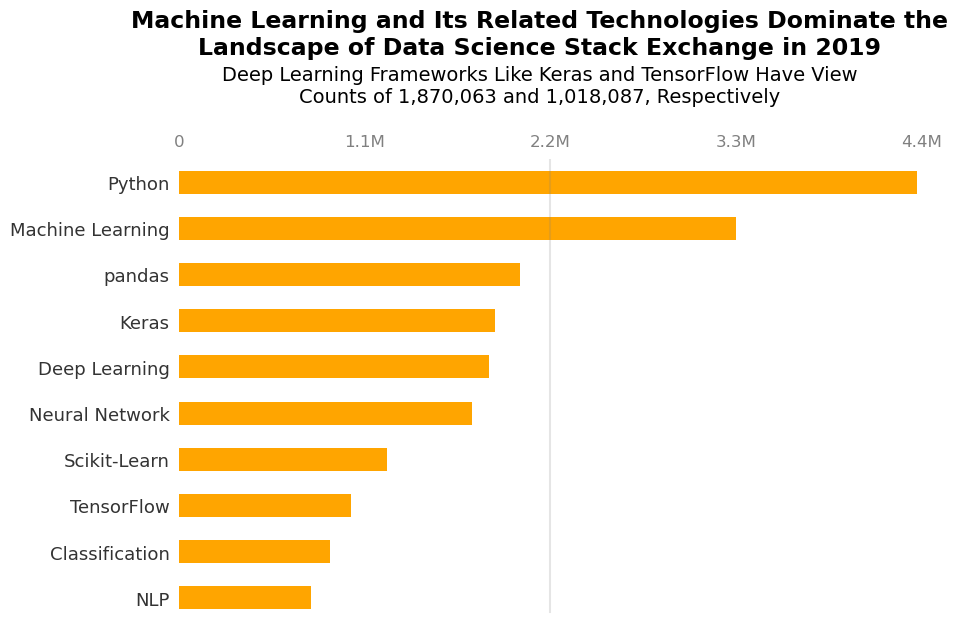

In [10]:
# Create figure and axes objects, and add a main title and subtitle
fig, ax = plt.subplots(figsize=(10,6))
plt.suptitle("Machine Learning and Its Related Technologies Dominate the\n\
Landscape of Data Science Stack Exchange in 2019",
             x=0.485, y=1.13, fontsize=17, ha="center", fontweight='bold')
plt.title("Deep Learning Frameworks Like Keras and TensorFlow Have View\n\
Counts of 1,870,063 and 1,018,087, Respectively", 
          ha="center", x=0.465, y=1.105, fontsize=14)

# Create a horizontal bar plot for the top 10 most viewed tags
top_10_viewed.plot.barh(x="Tags", y="ViewCount", color="#ffa500", legend=False, ax=ax)

# Customize ticks, labels, and add a vertical line
ax.set_yticklabels(['NLP', 'Classification', 'TensorFlow', 'Scikit-Learn', 'Neural Network',
                    'Deep Learning', 'Keras', 'pandas', 'Machine Learning', 'Python'])
ax.set_ylabel(None) 
ax.set_xticks([0, 1100000, 2200000, 3300000, 4400000])  
ax.set_xticklabels(['0', '1.1M', '2.2M', '3.3M', '4.4M'])  
ax.xaxis.tick_top()

ax.tick_params(top=False, left=False)     
ax.tick_params(axis='x', colors='grey', labelsize=12)
ax.tick_params(axis='y', colors='#333333', labelsize=13)

ax.axvline(x=2200000, ymin=0.02, c='grey', alpha=0.2) 

# Remove spines from the plot
ax.spines[:].set_visible(False)

# Display the plot
plt.show()

Based on the top `10` most viewed tags, it's evident that machine learning and its related technologies dominate the landscape of Data Science Stack Exchange in `2019`. `Python`, as a primary programming language in data science, holds the top spot with a staggering `4,375,482` views. Following are `Machine Learning` and `pandas` with `3,298,224` and `2,016,546` views, respectively.

Furthermore, deep learning frameworks such as `Keras` and `TensorFlow` have garnered significant attention, with `1,870,063` and `1,018,087` views, respectively. Additionally, `Scikit-Learn`, a versatile machine learning library in Python, has also attracted substantial interest, boasting `1,233,332` views.

The prominence of these tags underscores the importance of Python and machine learning in the data science community. It also reflects the growing interest and adoption of advanced data analysis and predictive modeling techniques.

### 8.3. Comparing the Top 10 Most Used and Viewed Tags

Next, we'll create a side-by-side comparison of the top `10` most used and most viewed tags. The left subplot will show the most used tags, while the right subplot will display the most viewed tags.

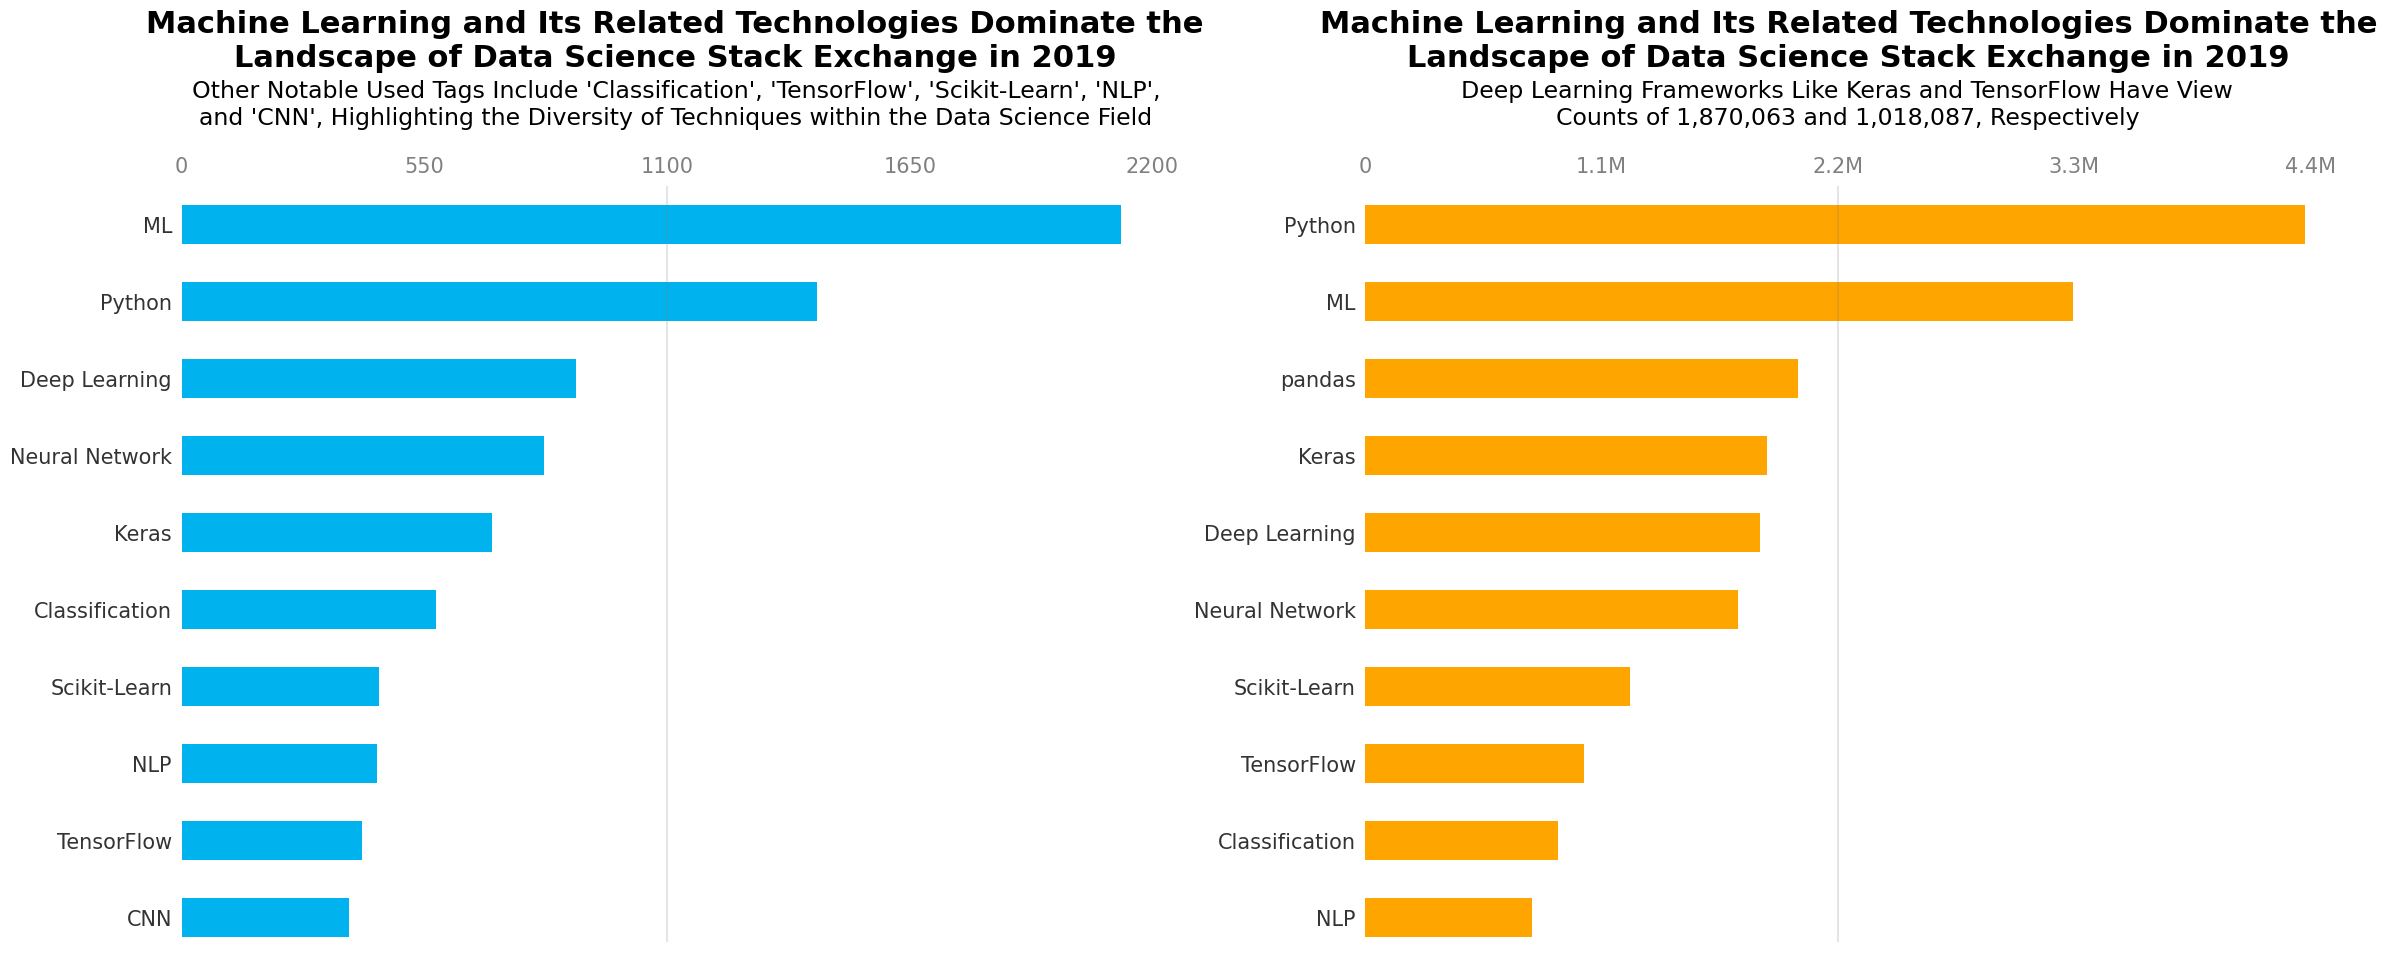

In [11]:
# Create subplots with specified figure size
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((28, 10))

# Plot the top 10 most used tags on the left, and the top 10 most viewed tags on the right
top_10_used.plot(kind="barh", color="#00B2EE", legend=False, ax=ax[0])
top_10_viewed.plot(kind="barh", color="#ffa500", legend=False, ax=ax[1])

# Set title and additional text for the left subplot
ax[0].set_title("Machine Learning and Its Related Technologies Dominate the\n\
Landscape of Data Science Stack Exchange in 2019",
                x=0.5, y=1.145, fontsize=22, fontweight='bold', ha="center")
ax[0].text(s="Other Notable Used Tags Include 'Classification', 'TensorFlow', 'Scikit-Learn', 'NLP',\n\
and 'CNN', Highlighting the Diversity of Techniques within the Data Science Field",
           x=1120, y=10.3, fontsize=17, ha="center")

# Set title and additional text for the right subplot
ax[1].set_title("Machine Learning and Its Related Technologies Dominate the\n\
Landscape of Data Science Stack Exchange in 2019",
                x=0.49, y=1.145, fontsize=22, fontweight='bold', ha="center")
ax[1].text(s="Deep Learning Frameworks Like Keras and TensorFlow Have View\n\
Counts of 1,870,063 and 1,018,087, Respectively",
           x=2245000, y=10.3, fontsize=17, ha="center")

# Set y-axis labels for both subplots
ax[0].set_yticklabels(['CNN', 'TensorFlow', 'NLP', 'Scikit-Learn', 'Classification', 'Keras',
                       'Neural Network', 'Deep Learning', 'Python', 'ML'])
ax[1].set_yticklabels(['NLP', 'Classification', 'TensorFlow', 'Scikit-Learn', 'Neural Network',
                       'Deep Learning', 'Keras', 'pandas', 'ML', 'Python'])

# Set common parameters for both subplots
for i in range(2):
    ax[i].set_ylabel(None)
    ax[i].xaxis.tick_top()
    ax[i].tick_params(top=False, left=False)
    ax[i].tick_params(axis='x', colors='grey', labelsize=15)
    ax[i].tick_params(axis='y', colors='#333333', labelsize=15)
    ax[i].spines[:].set_visible(False)

# Customize ticks, labels, and add a vertical line for both subplots
ax[0].set_xticks([0, 550, 1100, 1650, 2200]) 
ax[1].set_xticks([0, 1100000, 2200000, 3300000, 4400000])  
ax[1].set_xticklabels(['0', '1.1M', '2.2M', '3.3M', '4.4M'])
ax[0].axvline(x=1100, ymin=0.02, c='grey', alpha=0.2)  
ax[1].axvline(x=2200000, ymin=0.02, c='grey', alpha=0.2) 

# Display the plot
plt.show()

Overall, these insights underscore the significance of Python, machine learning, and related technologies, reflecting the community's focus on advanced data analysis and predictive modeling capabilities.

## 9. Understanding Relationships Between Tags

### 9.1. Analyzing the Top 20 Most Used and Viewed Tags

We're now going to create two DataFrames to select the top `20` most used and most viewed tags. Based on the previous results, we predict that most top tags will be present in both DataFrames. Let's now identify the tags present in `most_used` but absent in `most_viewed` by checking for missing values in `ViewCount`.

In [12]:
# Select the top 20 most used and most viewed tags
most_used = use_counts[:20]
most_viewed = view_counts.sort_values(by='ViewCount', ascending=False)[:20]

# Merge both DataFrames to identify tags present in `most_used` but not in `most_viewed`
in_used = pd.merge(most_used, most_viewed, how="left", on="Tags")
in_used.set_index("Tags", inplace=True)
in_used

,UseCount,ViewCount
Tags,,
machine-learning,2129,3298224.0
python,1439,4375482.0
deep-learning,894,1837242.0
neural-network,822,1734540.0
keras,704,1870063.0
classification,577,895134.0
scikit-learn,448,1233332.0
nlp,443,777799.0
tensorflow,409,1018087.0


Similarly, let's identify the tags present in `most_viewed` but not in `most_used`.

In [13]:
# Merge both DataFrames to identify tags present in `most_viewed` but not in `most_used`
in_viewed = most_used.merge(most_viewed, how="right", on="Tags")
in_viewed.set_index("Tags", inplace=True)
in_viewed

,UseCount,ViewCount
Tags,,
python,1439.0,4375482
machine-learning,2129.0,3298224
pandas,315.0,2016546
keras,704.0,1870063
deep-learning,894.0,1837242
neural-network,822.0,1734540
scikit-learn,448.0,1233332
tensorflow,409.0,1018087
classification,577.0,895134


From the results above, we observe that:

- Tags exclusively present in `most_used` include `predictive-modeling`, `feature-selection`, `data-mining`, `clustering`, and `r`.
- Tags exclusively present in `most_viewed` include `dataframe`, `xgboost`, `pytorch`, `numpy` and `bert`.

Some tags also demonstrate a clear relationship. For instance, `pandas` is associated with `python` because pandas is a Python library. Therefore, creating content about pandas enables us to address both tags simultaneously.

Conversely, certain tag pairs like `pandas` and `r` appear unrelated:

In [14]:
# Filter questions containing both 'r' and 'pandas' in their tags
questions_2019[questions_2019["Tags"].apply(lambda tags: 
                                            True if ("r" in tags and "pandas" in tags) else False)]

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
1968,49148,1,2019-04-11 19:41:39,1,265,"[r, data-mining, pandas, matlab, databases]",3,0


As we can see, this question was posted on `April 11, 2019`, with a score of `1` and `265` views. The tags associated with it include `r`, `data-mining`, `pandas`, `matlab`, and `databases`. It received `3` answers but wasn't marked as a favorite by any user.

### 9.2. Exploring and Visualizing Tag Pairing Frequencies

We're going to figure out how tags relate by counting how often they appear together. First, we'll make a list of all tags, then create a DataFrame using that list for both rows and columns.

In [15]:
# Create a list of all tags, and a DataFrame to store relations between tags
all_tags = list(use_counts['Tags'])
tag_relations = pd.DataFrame(index=all_tags, columns=all_tags)

# Display the first 4x4 portion of the DataFrame
tag_relations.iloc[0:4, 0:4]

,machine-learning,python,deep-learning,neural-network
machine-learning,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN
deep-learning,NaN,NaN,NaN,NaN
neural-network,NaN,NaN,NaN,NaN


We will now populate this DataFrame with `0`. Then, for each list of tags in `questions_2019["Tags"]`, we'll increment the coinciding tags by `1`. The final DataFrame will indicate, for each pair of tags, how many times they were used together.

In [16]:
# Fill missing values with 0
tag_relations.fillna(0, inplace=True)

# Increment counts for coinciding tags
for tags in questions_2019["Tags"]:
    tag_relations.loc[tags, tags] += 1

# Display the first 4x4 portion of the DataFrame
tag_relations.iloc[0:4, 0:4]

,machine-learning,python,deep-learning,neural-network
machine-learning,2129,402,324,291
python,402,1439,107,108
deep-learning,324,107,894,243
neural-network,291,108,243,822


The `tag_relations` DataFrame is quite large. Hence, we'll focus our attention on the `20` most used tags, and add some colors to increase readability.

In [17]:
# Extract relations for the 20 most used tags
most_used_relations = tag_relations.loc[most_used['Tags'], most_used['Tags']]

# Define a function to style cells of a DataFrame
def style_cells(df):
    
    # Create an empty DataFrame with the same index and columns as the input 
    helper_df = pd.DataFrame('', index=df.index, columns=df.columns)
    
    # Highlight diagonal cells in blue
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "background-color: #00B2EE"
    
    return helper_df

# Apply the styling function to `most_used_relations`, then return the styled DataFrame
most_used_relations.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,scikit-learn,nlp,tensorflow,cnn,time-series,pandas,lstm,regression,dataset,clustering,predictive-modeling,r,feature-selection,data-mining
machine-learning,2129,402,324,291,146,221,161,108,68,95,104,57,43,101,76,52,98,48,81,85
python,402,1439,107,108,204,83,199,67,119,46,76,218,41,50,39,42,29,19,23,21
deep-learning,324,107,894,243,195,50,12,69,103,120,30,1,74,19,22,2,23,4,18,20
neural-network,291,108,243,822,191,54,20,27,81,96,25,1,48,40,18,4,8,6,7,4
keras,146,204,195,191,704,48,26,20,196,93,34,2,96,24,8,0,9,8,1,1
classification,221,83,50,54,48,577,41,34,17,14,19,3,13,30,20,10,23,8,18,18
scikit-learn,161,199,12,20,26,41,448,10,8,0,7,31,1,33,6,23,11,1,19,2
nlp,108,67,69,27,20,34,10,443,7,9,0,4,20,2,10,12,1,3,4,6
tensorflow,68,119,103,81,196,17,8,7,409,41,6,2,26,6,5,0,2,1,0,0
cnn,95,46,120,96,93,14,0,9,41,378,7,1,18,4,8,0,5,1,1,2


The cells highlighted in blue indicate how many times each of the `20` most used tags was used. For example, we previously observed that `machine-learning` was used `2693` times, which is confirmed in this DataFrame. Next, let's create a heatmap to better visualize and understand this data.

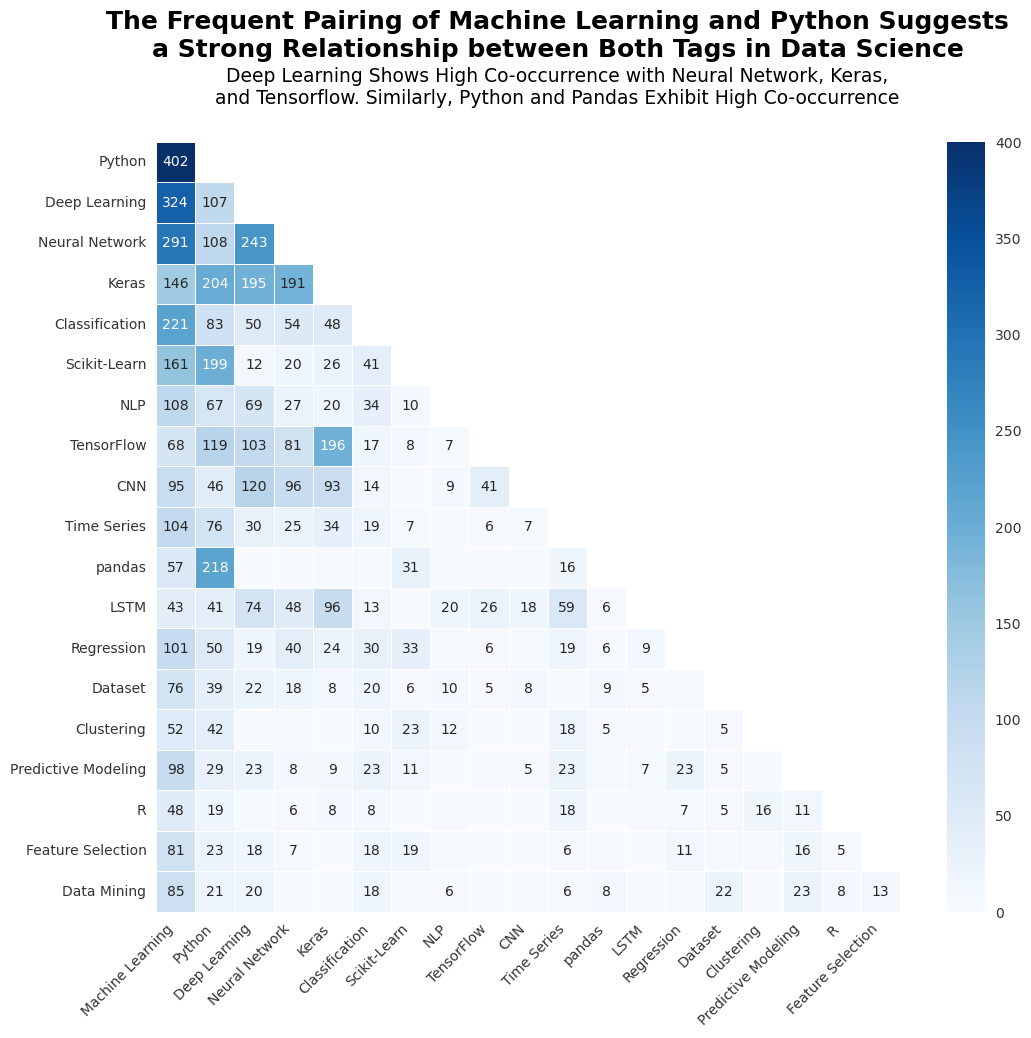

In [18]:
# Create a mask to hide the upper triangle of the heatmap
mask = np.zeros_like(most_used_relations.iloc[1:, :-1])
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap of tag pairing frequencies
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(most_used_relations.iloc[1:, :-1], annot=True, annot_kws={"size": 10},
                 vmin=0, vmax=400, linewidths=0.5, cmap="Blues", fmt='d', mask=mask)

# Set title and additional text
ax.set_title("The Frequent Pairing of Machine Learning and Python Suggests\n\
a Strong Relationship between Both Tags in Data Science", 
             x=0.54, y=1.1, fontsize=18, ha='center', weight='bold')
ax.text(s="Deep Learning Shows High Co-occurrence with Neural Network, Keras,\n\
and Tensorflow. Similarly, Python and Pandas Exhibit High Co-occurrence",
        x=10.25, y=-0.95, fontsize=13.5, ha='center')

# Customize tick parameters and labels
ax.tick_params(left=False, bottom=False)
ax.tick_params(axis='both', labelsize=10)
ax.set_xticklabels(['Machine Learning', 'Python', 'Deep Learning', 'Neural Network', 'Keras',
                    'Classification', 'Scikit-Learn', 'NLP', 'TensorFlow', 'CNN', 'Time Series',
                    'pandas', 'LSTM', 'Regression', 'Dataset', 'Clustering', 'Predictive Modeling',
                    'R', 'Feature Selection'], c='#333333', ha="right", rotation=45)
ax.set_yticklabels(['Python', 'Deep Learning', 'Neural Network', 'Keras',
                    'Classification', 'Scikit-Learn', 'NLP', 'TensorFlow', 'CNN', 'Time Series',
                    'pandas', 'LSTM', 'Regression', 'Dataset', 'Clustering', 'Predictive Modeling',
                    'R', 'Feature Selection', 'Data Mining'], c='#333333')

# Adjust annotations and hide values lower than 5
for text in ax.texts:
    t = text.get_text()
    
    # Check if the string represents a digit
    if t.isdigit():
        t = int(t)
        if t < 5:
            text.set_text('')  # Hide annotations for values lower than 5
        else:
            text.set_text(t)   # Keep annotations for values greater than or equal to 5

# Adjust the size and color of the colorbar values, and remove tick marks
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelcolor='#333333', labelsize=10, right=False)

# Display the plot
plt.show()

The heatmap offers a clear visual insight into how often tags are paired together within the dataset. Each cell represents the frequency of co-occurrence between two tags, with values below `5` hidden for clarity.

We observe various patterns and associations among the tags. For instance, there is a notable frequency of pairings between `Machine Learning` and `Python`, indicating the strong relationship between them. Similarly, `Deep Learning` exhibits significant associations with `Neural Network`, `Keras`, and `TensorFlow`, reflecting the interconnectedness of these concepts in data science.

`Python` and `pandas` show a high co-occurrence, suggesting that Python is frequently used alongside the pandas library for data manipulation and analysis tasks. Additionally, `Classification` and `Scikit-Learn` appear to have a strong relationship, which is expected given that Scikit-Learn is a widely used machine learning library in Python often employed for classification tasks.

At a glance, someone with sufficient domain knowledge can discern that [deep learning](https://aws.amazon.com/what-is/deep-learning/) emerges as one of the most popular topics on Data Science Stack Exchange in `2019`.

## 10. Is Deep Learning Just a Passing Trend?

### 10.1. Identifying Deep Learning Questions from Tags

Before we finalize our decision, let's ensure the robustness of our findings with further evidence. Specifically, we should address a crucial question: *Is deep learning just a passing trend?* Ideally, the content we'll create in the future should remain relevant for an extended period.

The file `all_questions.csv` contains the results of the following query, which retrieves all questions ever asked on [Data Science Stack Exchange](https://datascience.stackexchange.com/) until `December 31, 2019`, along with their dates and tags:

```
SELECT Id, CreationDate, Tags
  FROM Posts
 WHERE PostTypeId = 1 AND CreationDate < '2020-01-01 00:00:00'
 ORDER BY Id;
```

In [19]:
# Read the CSV file containing all questions, and parse 'CreationDate' as datetime
all_questions = pd.read_csv("Datasets/all_questions.csv", parse_dates=["CreationDate"])

# Clean up the 'Tags' column by removing angle brackets and splitting tags into a list
all_questions["Tags"] = all_questions["Tags"].str.replace("^<|>$", "", regex=True).str.split("><")

# Display the first few rows
all_questions.head()

,Id,CreationDate,Tags
0,5,2014-05-13 23:58:30,[machine-learning]
1,7,2014-05-14 00:11:06,"[education, open-source]"
2,14,2014-05-14 01:25:59,"[data-mining, definitions]"
3,15,2014-05-14 01:41:23,[databases]
4,16,2014-05-14 01:57:56,"[machine-learning, bigdata, libsvm]"


Before determining which questions should be classified as deep learning questions, we need to establish what tags qualify as deep learning tags.

For our definition, a deep learning tag is one that belongs to the following list: `["cnn", "lstm", "keras", "tensorflow", "scikit-learn", "deep-learning", "neural-network"]`. To compile this list, we examined all the tags in `most_used`, and identified those related to deep learning.

Next, we will create a function that assigns a value of `1` to deep learning questions, and `0` to others. This approach will allow for easy identification of deep learning-related questions within the dataset.

In [20]:
# Define a function to classify questions as deep learning or not
def categorize_question(tags):
    for t in tags:
        if t in ["cnn", "lstm", "keras", 
                 "tensorflow", "scikit-learn",
                 "deep-learning", "neural-network"]:
            return 1
    return 0

# Apply the function to the 'Tags' column, and create a new column 'DeepLearning'
all_questions["DeepLearning"] = all_questions["Tags"].apply(categorize_question)
all_questions.tail()

,Id,CreationDate,Tags,DeepLearning
18799,65663,2019-12-31 13:25:01,[information-retrieval],0
18800,65664,2019-12-31 14:15:54,"[neural-network, deep-learning, classification...",1
18801,65666,2019-12-31 14:59:18,"[machine-learning, scikit-learn, cross-validat...",1
18802,65667,2019-12-31 16:08:06,[bayesian],0
18803,65671,2019-12-31 18:08:12,"[deep-learning, bert, transformer, hyperparame...",1


Looking at the output, we can see that the function effectively classifies questions based on their tags. For example, rows with tags like `deep-learning`, `neural-network`, and `scikit-learn` are labeled as deep learning, while those with different or unrelated tags are labeled as non-deep learning.

### 10.2. Exploring Quarterly Deep Learning Trends

The landscape of data science technology isn't so dynamic as to warrant daily, weekly, or even monthly tracking. Thus, we'll group the questions by quarter and count the following to track interest in deep learning across time:

1. The number of deep learning questions asked per quarter.
2. The total number of questions asked per quarter.
3. The proportion of deep learning questions relative to the total number of questions per quarter.

In [21]:
# Define a function to fetch the quarter of a given datetime
def find_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month - 1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

# Apply the function to the 'CreationDate' column, and create a new column 'Quarter'
all_questions["Quarter"] = all_questions["CreationDate"].apply(find_quarter)
all_questions.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,5,2014-05-13 23:58:30,[machine-learning],0,14Q2
1,7,2014-05-14 00:11:06,"[education, open-source]",0,14Q2
2,14,2014-05-14 01:25:59,"[data-mining, definitions]",0,14Q2
3,15,2014-05-14 01:41:23,[databases],0,14Q2
4,16,2014-05-14 01:57:56,"[machine-learning, bigdata, libsvm]",0,14Q2


The function effectively extracts the quarter information from the `CreationDate` column. This allows us to categorize each question based on the quarter in which it was created.

In [22]:
# Group questions by quarter, and aggregate deep learning and total question counts
quarterly = all_questions.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})

# Rename the columns and calculate the rate of deep learning questions relative to total questions
quarterly.columns = ['DLQuestions', 'TotalQuestions']
quarterly["DLQuestionsRate"] = (round(quarterly["DLQuestions"] / quarterly["TotalQuestions"], 3))

# Reset the index to make 'Quarter' a regular column
quarterly.reset_index(inplace=True)
quarterly.head()

,Quarter,DLQuestions,TotalQuestions,DLQuestionsRate
0,14Q2,9,157,0.057
1,14Q3,13,188,0.069
2,14Q4,21,214,0.098
3,15Q1,17,188,0.090
4,15Q2,28,284,0.099


Finally, let's create a visual representation of the growth in deep learning questions on Data Science Stack Exchange (DSSE) until the end of the year `2019`. We'll plot the rate of deep learning questions, as well as the total number of questions asked each quarter.

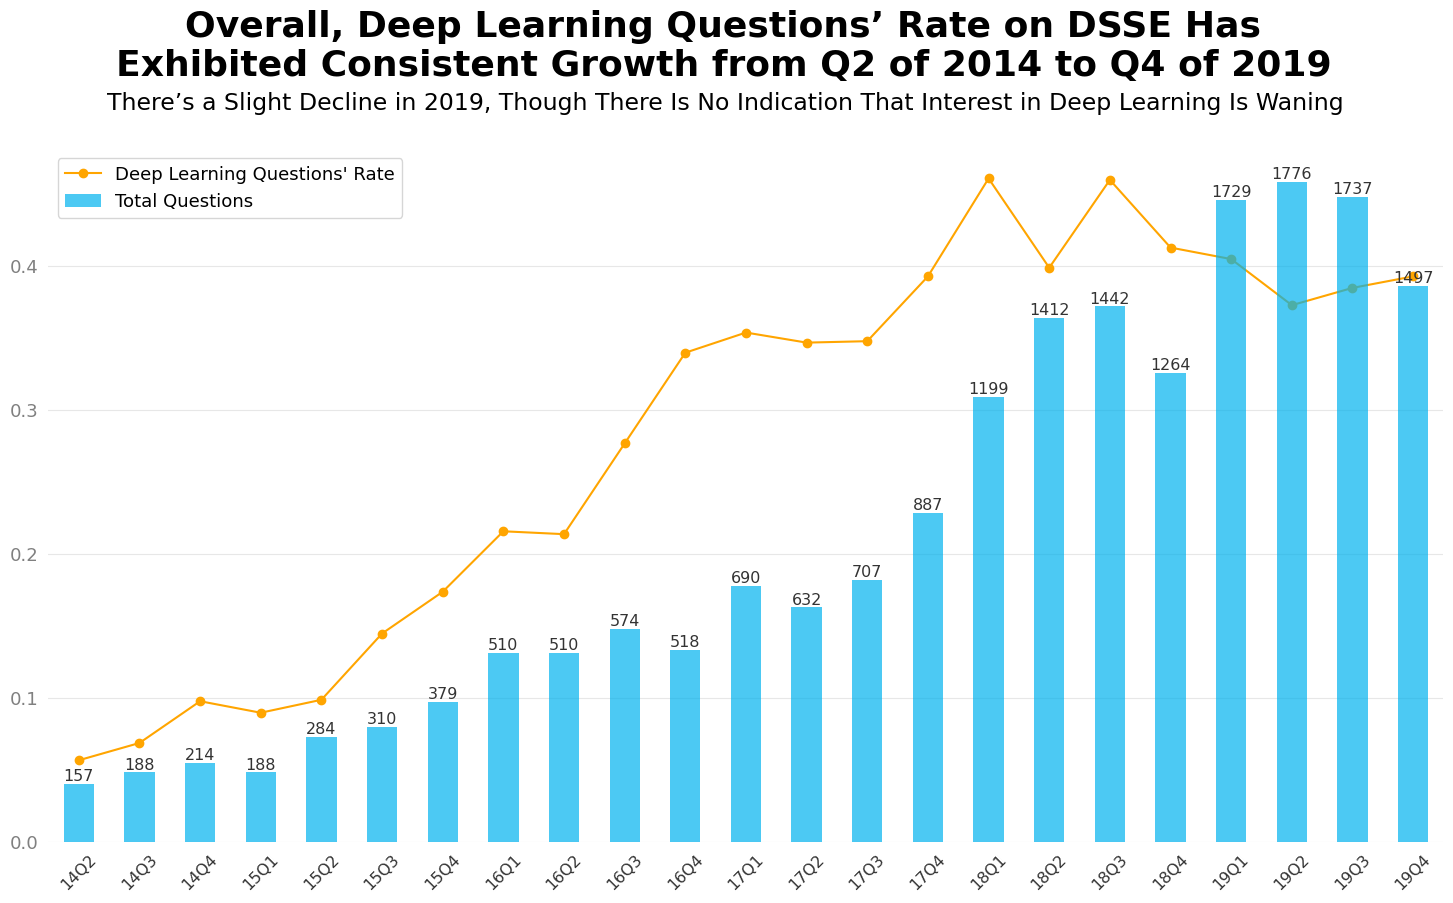

In [23]:
# Plot deep learning questions' rate and total questions over time
ax1 = quarterly.plot(x="Quarter", y="DLQuestionsRate", kind="line", marker="o", color="#ffa500",
                     figsize=(18, 9))
ax2 = quarterly.plot(x="Quarter", y="TotalQuestions", kind="bar", color='#00B2EE', ax=ax1, 
                     alpha=0.7, rot=45, secondary_y=True)

# Set titles for the plot and axes
plt.suptitle("Overall, Deep Learning Questions’ Rate on DSSE Has\n\
Exhibited Consistent Growth from Q2 of 2014 to Q4 of 2019", 
             x=0.5, y=1.035, ha='center', fontweight='bold', fontsize=26)
plt.title("There’s a Slight Decline in 2019, Though There Is No Indication That Interest in Deep Learning Is Waning", 
          x=0.485, y=1.045, fontsize=17, ha='center')

# Set tick parameters, limits, grid, and remove x-axis label
ax1.tick_params(axis='x', labelcolor='#333333', labelsize=11.5)
ax1.tick_params(axis='y', colors='grey', labelsize=13)
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(bottom=0)
ax1.set_xlabel("")

# Add total question counts above the bars
for i, total in quarterly["TotalQuestions"].items():
    ax2.text(x=i, y=total, s=str(total), ha="center", va="bottom", c='#333333', size=11.5)

# Combine legends from both subplots and set custom labels
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
l1 = ['Deep Learning Questions\' Rate']
l2 = ['Total Questions']

ax1.legend(handles=h1 + h2, labels=l1 + l2, loc="upper left", prop={"size": 13})

# Remove spines and ticks
for ax in (ax1, ax2):
    ax.spines[:].set_visible(False)
    ax.tick_params(bottom=False, left=False, right=False, labelright=False)

# Display the plot
plt.show()

The rate of deep learning questions on DSSE has exhibited consistent growth over time, with occasional fluctuations. Initially low in `2014` and `2015`, it gradually increased, reaching its peak in `Q1` of `2018`. However, there's a slight decline in `2019`, though there is no indication that interest in deep learning is waning. Therefore, deep learning remains a significant topic, comprising a substantial portion of total questions asked each quarter, especially in the last years of our data. As a result, we support the idea of creating deep learning content.

## 11. Conclusion

In this project, we imagined ourselves working for a company that creates data science content. Our task was to determine the **"best"** content to write about, answering the main question: *What do people want to learn about in data science?* This insight could also guide us in identifying the most profitable content. As a result, we delved into [Stack Exchange](https://stackexchange.com/) and discovered a comprehensive list of Stack Exchange websites sorted by the percentage of questions that received answers. The prevalence of unanswered questions on [Data Science Stack Exchange](https://datascience.stackexchange.com/) (DSSE), a site dedicated to data science, made it an ideal candidate for our investigation.

We discovered that Data Science Stack Exchange hosts questions covering various aspects of data science. Also, we analyzed the site's homepage and post structure. Upon exploring DSSE's [database](https://data.stackexchange.com/datascience/query/new) and examining several tables, we identified the `Posts` table as particularly promising for uncovering popular content, and we focused only on the columns relevant to our objective. Furthermore, we initially limited our analysis to questions from `2019` and performed some light data cleaning tasks before proceeding.

To determine the most popular tags, we considered both the number of times each tag was used and viewed. After identifying and visualizing the top `10` most used and viewed tags, it became evident that machine learning and its related technologies dominated the landscape of Data Science Stack Exchange in `2019`. Tags like `machine-learning` and `python` emerged as the most frequently used and viewed. Additionally, deep learning tags like `deep-learning`, `neural-network`, and `keras` featured prominently among the top tags, along with other notable ones like `classification`, `scikit-learn`, and `tensorflow`. These findings highlight the diverse array of topics within the data science field, and reflect the growing interest and adoption of advanced data analysis and predictive modeling techniques.

After analyzing the top `20` most used and viewed tags, we found that overall, they share many common tags. Certain tag pairs like `pandas` and `r` appear unrelated. However, we found that only one question contained both tags simultaneously. Moreover, we explored relationships among the top `20` most used tags by analyzing their co-occurrence frequency, visualizing their patterns with a heatmap. Notably, `machine-learning` and `python` showed a strong association. Similarly, `deep-learning` was significantly linked with `neural-network`, `keras`, and `tensorflow`. The high co-occurrence of `python` and `pandas` suggests frequent usage of Python alongside the pandas library for data tasks. Furthermore, `classification` and `scikit-learn` exhibited a robust connection, given Scikit-Learn's common use for classification in Python. Overall, deep learning emerged as a prominent topic on Data Science Stack Exchange in `2019`.

Before finalizing our decision, we sought further evidence to ensure the robustness of our findings. Since our goal is to create content that remains relevant for an extended period, we aimed to address a crucial question: *Is deep learning just a passing trend?* To answer this question, we retrieved all questions ever asked on DSSE until `December 31, 2019`, along with their dates and tags. Subsequently, we identified which tags qualify as deep learning tags, and defined a function to classify questions based on their tags. Given the relatively stable landscape of data science technology, we grouped the questions by quarter. For each quarter, we counted both the number of deep learning questions and the total number of questions asked. Additionally, we calculated the proportion of deep learning questions relative to the total number of questions per quarter.

Finally, we visualized both the rate of deep learning questions and the total number of questions asked each quarter on Data Science Stack Exchange (DSSE) until the end of `2019`. Overall, we observed a consistent growth in the rate of deep learning questions on DSSE, reaching its peak in `Q1` of `2018`. Although there was a slight decline in `2019`, there is no indication that interest in deep learning is diminishing. Consequently, deep learning remains a significant topic, constituting a substantial portion of the total questions asked each quarter, especially in the later years of our data. Based on these findings, we advocate for the creation of deep learning content.